In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_table(r"G:\基础+AI\symbol.txt",header = 0,index_col = 0)
data.head()  #查看前5行

,TCGA-DM-A288-01A,TCGA-QL-A97D-01A,TCGA-AZ-5403-01A,TCGA-G4-6299-01A,TCGA-AZ-4315-01A,TCGA-AZ-4614-01A,TCGA-AA-3549-01A,TCGA-AY-4071-01A,TCGA-CM-4752-01A,TCGA-AA-3516-01A,...,TCGA-AA-A02E-01A,TCGA-AA-3861-01A,TCGA-G4-6295-01A,TCGA-AA-A01C-01A,TCGA-A6-2680-01A,TCGA-CM-5861-01A,TCGA-AA-3561-01A,TCGA-AZ-6608-01A,TCGA-AA-3527-01A,TCGA-AA-3488-01A
Gene_ID,,,,,,,,,,,,,,,,,,,,,
LINC02082,0.000000,0.000000,0.000000,0.000000,0.000000,10.434136,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC090241.2,6.942837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RAB4B,16.013189,15.453493,16.332159,15.805361,15.889432,16.247308,16.066968,16.997743,16.961353,15.925800,...,16.278212,16.239995,15.299347,16.002474,15.692104,15.628198,15.800874,16.250677,15.859280,16.783116
TIGAR,15.909571,17.291715,18.028785,16.596075,18.231358,16.451544,17.631291,16.508597,17.325230,18.120548,...,16.356400,17.961272,17.497375,16.271475,16.449357,16.660845,17.467790,17.182899,15.454908,17.060976
RNF44,19.203941,18.962602,17.654410,18.533142,17.620851,18.145546,18.720498,19.101503,17.764361,17.802783,...,18.834219,18.318620,18.893857,18.962490,19.334029,18.587598,18.608768,18.851812,19.639751,18.775598


In [4]:
data.shape

(56530, 471)

In [5]:
data2 = np.log2(data+0.0001)
data2.head()
  

,TCGA-DM-A288-01A,TCGA-QL-A97D-01A,TCGA-AZ-5403-01A,TCGA-G4-6299-01A,TCGA-AZ-4315-01A,TCGA-AZ-4614-01A,TCGA-AA-3549-01A,TCGA-AY-4071-01A,TCGA-CM-4752-01A,TCGA-AA-3516-01A,...,TCGA-AA-A02E-01A,TCGA-AA-3861-01A,TCGA-G4-6295-01A,TCGA-AA-A01C-01A,TCGA-A6-2680-01A,TCGA-CM-5861-01A,TCGA-AA-3561-01A,TCGA-AZ-6608-01A,TCGA-AA-3527-01A,TCGA-AA-3488-01A
Gene_ID,,,,,,,,,,,,,,,,,,,,,
LINC02082,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,3.383253,-13.287712,-13.287712,-13.287712,-13.287712,...,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712
AC090241.2,2.795546,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,...,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712,-13.287712
RAB4B,4.001198,3.949870,4.029652,3.982351,3.990005,4.022138,4.006035,4.087280,4.084188,3.993303,...,4.024879,4.021488,3.935408,4.000232,3.971976,3.966089,3.981942,4.022437,3.987264,4.068947
TIGAR,3.991832,4.112017,4.172238,4.052779,4.188358,4.040160,4.140074,4.045154,4.114811,4.179563,...,4.031792,4.166826,4.129075,4.024282,4.039968,4.058398,4.126633,4.102910,3.950003,4.092637
RNF44,4.263338,4.245093,4.141965,4.212043,4.139220,4.181552,4.226555,4.255622,4.150922,4.154039,...,4.235292,4.195247,4.239853,4.245084,4.273078,4.216276,4.217918,4.236639,4.295712,4.230795


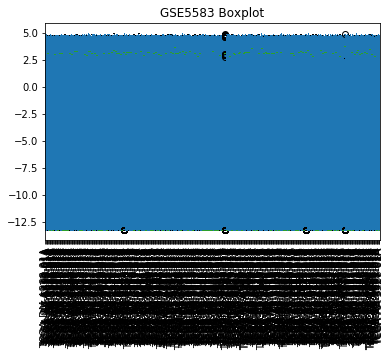

In [6]:
 # 每个阵列的箱线图
plt.show(data2.plot(kind = 'box', title = 'GSE5583 Boxplot', rot = 90))

In [8]:
# plt.show(data2.plot(kind = 'density', title = 'GSE5583 Density'))

In [9]:
import pandas as pd 
tsv_file=r"F:\01 科研项目数据-2022\06-基础AI\diff\TCGA-COAD.htseq_counts.tsv"

# readinag given tsv file

csv_table=pd.read_table(tsv_file,sep='\t')

# converting tsv file into csv

csv_table.to_csv(r"F:\01 科研项目数据-2022\06-基础AI\diff\TCGA-COAD.htseq_counts.csv",index=False)

# output

print("Successfully made csv file")

Successfully made csv file
